### Metropolis Method

### Metropolis Method for three-variable Ising Model

### Joint probability distribution $P(x_1,x_2,x_3)$
In case of metropolis method, regularization term $Z$ will be not considered due to cancel down in calculating probability raio.

In [1]:
import numpy as np
def joint_prob(x, theta):
    return np.exp(theta*(x[0]*x[1] + x[1]*x[2] + x[2]*x[0]))

### Compute a probability ratio $r$

In [2]:
def compute_prob_ratio(x_bef, x_aft, theta):
    prob_bef = joint_prob(x_bef, theta)
    prob_aft = joint_prob(x_aft, theta)
    return prob_aft / prob_bef

### Function of metropolis method

In [3]:
import random
import copy
def metropolis_method(x_bef, theta):
    x_aft = copy.copy(x_bef)
    ### Step 1
    pl = random.choice(range(3))

    ### Step 2
    x_aft[pl] = -x_bef[pl]

    ### Step 3
    r = compute_prob_ratio(x_bef, x_aft, theta)

    ### Step 4
    R = random.uniform(0, 1)

    ### Step 5
    if r > R:
        return x_aft
    else:
        return x_bef

### Execute

In [6]:
import copy
def execute(theta, init_state=[1,1,1], repeat=100):
    ret = []
    current = copy.copy(init_state)
    for i in range(repeat):
        ret.append(metropolis_method(current, theta))
    return ret

# params
theta = 0.2
repeat = 1000

# initial condition
state = [-1, -1, -1]

# execute
output = execute(theta, state, repeat)

# labels
labels = [str(ptr) for ptr in output]

### Plot the number of each state

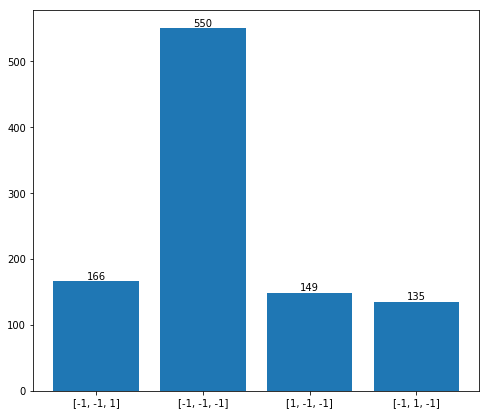

In [16]:
%matplotlib inline
import collections
from matplotlib import pyplot as plt
emg_count = collections.Counter(labels)

plt.figure(figsize=(8,7))
plt.bar(range(len(emg_count)), emg_count.values(), align='center')
plt.xticks(range(len(emg_count)), list(emg_count.keys()))
for i, v in enumerate(emg_count.values()):
    plt.text(i, v, v, ha='center', va='bottom')
plt.show()

### Confirm each state in animation
 - When occured some errors, pls restart kernel.

<IPython.core.display.Javascript object>


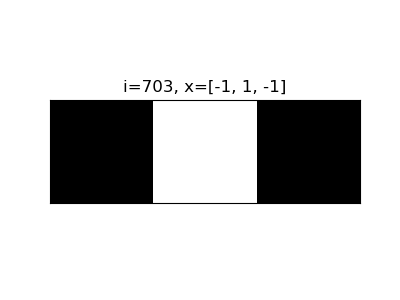

In [5]:
%matplotlib nbagg
import numpy as np
import itertools
from matplotlib import pyplot as plt
from matplotlib import animation

def plot_iterator(i, out, xlabel):
    plt.cla()
    img = np.array(out[i]).reshape((1,3))
    plt.xticks([])
    plt.yticks([])
    plt.title(f"i={i}, x={xlabel[i]}")
    plt.imshow(img, cmap="gray")

fig = plt.figure(figsize=(4,3))
ani = animation.FuncAnimation(fig,\
                              plot_iterator,\
                              fargs=(output, labels),\
                              interval=100,\
                              frames=repeat)
plt.show()